In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.1.0-rc1


In [0]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [0]:
# Build the model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [6]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 291us/sample - loss: 0.3324 - accuracy: 0.8922 - val_loss: 0.1326 - val_accuracy: 0.9590
Epoch 2/10
60000/60000 [==============================] - 10s 169us/sample - loss: 0.1061 - accuracy: 0.9682 - val_loss: 0.0873 - val_accuracy: 0.9741
Epoch 3/10
60000/60000 [==============================] - 10s 169us/sample - loss: 0.0745 - accuracy: 0.9778 - val_loss: 0.0768 - val_accuracy: 0.9765
Epoch 4/10
60000/60000 [==============================] - 10s 170us/sample - loss: 0.0563 - accuracy: 0.9827 - val_loss: 0.0589 - val_accuracy: 0.9830
Epoch 5/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.0461 - accuracy: 0.9861 - val_loss: 0.0574 - val_accuracy: 0.9829
Epoch 6/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.0410 - accuracy: 0.9878 - val_loss: 0.0502 - val_accuracy: 0.9850
Epoch 7/10
60000/60000 [====================

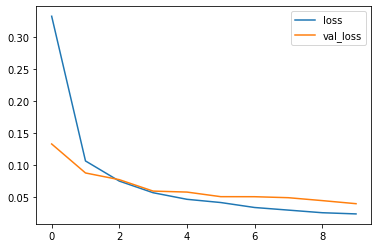

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

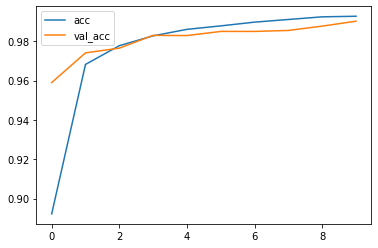

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 972    0    0    0    0    1    5    1    1    0]
 [   0 1134    0    0    0    0    1    0    0    0]
 [   2    0 1025    0    2    0    0    3    0    0]
 [   0    0    4  999    0    1    0    3    2    1]
 [   0    0    0    0  974    0    1    1    1    5]
 [   1    1    0    3    0  882    1    1    1    2]
 [   1    2    0    0    4    2  949    0    0    0]
 [   0    5    6    1    1    0    0 1013    0    2]
 [   0    0    2    3    1    4    0    3  956    5]
 [   0    0    0    0    5    1    0    5    0  998]]


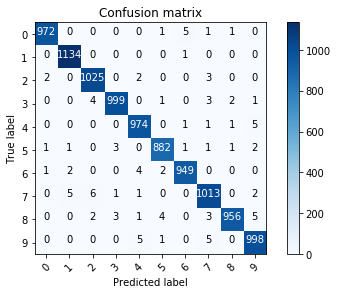

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

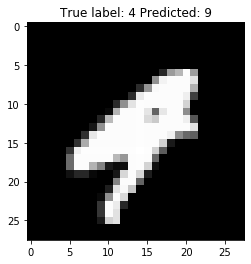

In [16]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

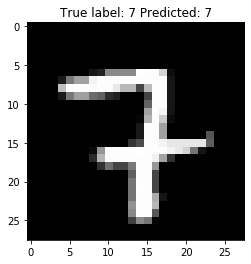

In [19]:
# Show some correctly classified examples
correctly_classified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(correctly_classified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));